<a href="https://colab.research.google.com/github/budoorhza/PROJECT363/blob/main/THIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [33]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
!cp '/content/drive/MyDrive/363PROJECT/BTD.zip' /content/

In [93]:
import shutil
zip_path = '/content/BTD.zip'
extract_path = '/content/BTD'
shutil.unpack_archive(zip_path, extract_path)

In [94]:
print("Files in extracted folder:", os.listdir(extract_path))

Files in extracted folder: ['yes', 'no', 'brain_tumor_dataset']


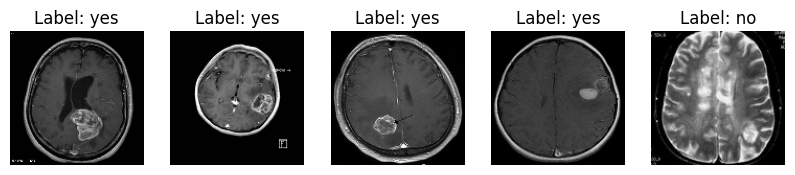

In [97]:
# مسارات المجلدات
data_path = "/content/BTD/brain_tumor_dataset"
categories = ["yes", "no"]

# تحضير البيانات
images = []
labels = []

# قراءة الصور من المجلدات وتحديد التصنيف
for category in categories:
    folder = os.path.join(data_path, category)
    label = categories.index(category)  # 0 لـ NO، 1 لـ YES
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # قراءة الصورة
        if img is not None:
            img = cv2.resize(img, (128, 128))  # تغيير حجم الصورة إلى 128x128
            images.append(img)
            labels.append(label)

# تحويل البيانات إلى مصفوفات NumPy
images = np.array(images)
labels = np.array(labels)

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# عرض بعض الصور لتأكيد البيانات
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {categories[y_train[i]]}")
    plt.axis('off')
plt.show()

In [98]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إنشاء مولد بيانات للتوسيع
data_gen = ImageDataGenerator(
    rescale=1./255,  # تطبيع البيانات
    rotation_range=20,  # تدوير الصور
    width_shift_range=0.1,  # تغيير عرض الصورة
    height_shift_range=0.1,  # تغيير ارتفاع الصورة
    shear_range=0.1,  # القص
    zoom_range=0.1,  # التكبير والتصغير
    horizontal_flip=True,  # قلب الصورة أفقيًا
    fill_mode='nearest'  # ملء الفراغات
)

# تطبيق التوسيع على بيانات التدريب فقط
X_train = X_train / 255.0  # تطبيع بيانات التدريب
X_test = X_test / 255.0  # تطبيع بيانات الاختبار


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# بناء نموذج شبكة عصبية
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # طبقة Convolution الأولى
    MaxPooling2D(2, 2),  # طبقة MaxPooling
    Conv2D(64, (3, 3), activation='relu'),  # طبقة Convolution الثانية
    MaxPooling2D(2, 2),  # طبقة MaxPooling
    Dropout(0.5),  # طبقة Dropout لتقليل التخصيص المفرط
    Flatten(),  # تسطيح المصفوفة إلى شكل 1D
    Dense(128, activation='relu'),  # طبقة Fully Connected
    Dense(1, activation='sigmoid')  # طبقة الإخراج (ثنائي: يحتوي على ورم أم لا)
])

# إعداد النموذج مع خوارزمية Adam وخسارة binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# عرض ملخص النموذج
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
# تدريب النموذج باستخدام البيانات
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # تقسيم جزء من البيانات للاختبار أثناء التدريب
    epochs=20,  # عدد العصور (epochs)
    batch_size=32,  # حجم الدفعة
    verbose=1  # طباعة التقدم
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 700ms/step - accuracy: 0.6646 - loss: 1.3297 - val_accuracy: 0.5366 - val_loss: 0.6759
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7091 - loss: 0.5826 - val_accuracy: 0.7805 - val_loss: 0.4983
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8086 - loss: 0.4720 - val_accuracy: 0.8049 - val_loss: 0.4320
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8388 - loss: 0.4289 - val_accuracy: 0.8537 - val_loss: 0.4161
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8572 - loss: 0.3676 - val_accuracy: 0.8293 - val_loss: 0.3891
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8716 - loss: 0.3063 - val_accuracy: 0.8293 - val_loss: 0.3641
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9300 - loss: 0.2223 - val_accuracy: 0.8537 - val_loss: 0.3541
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9489 - loss: 0.1697 - val_accuracy: 0.8780 - val_loss: 0.4122

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step - accuracy: 0.7625 - loss: 1.4219
Loss: 1.3346823453903198, Accuracy: 0.7843137383460999


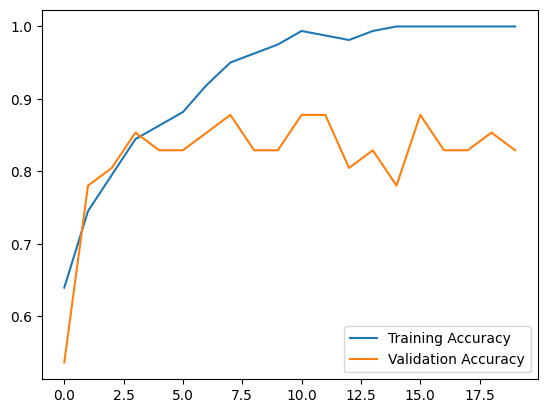

In [101]:
# تقييم النموذج باستخدام بيانات الاختبار
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# عرض نتائج التدريب
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
Prediction: NO (No Tumor)


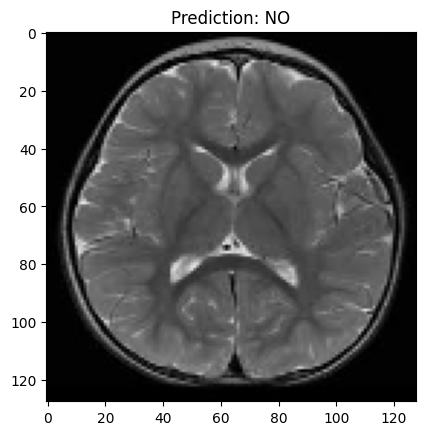

In [102]:
# التنبؤ باستخدام النموذج
sample_img = X_test[0].reshape(1, 128, 128, 3)  # أخذ أول صورة من بيانات الاختبار
prediction = model.predict(sample_img)

# عرض التنبؤ
if prediction[0][0] > 0.5:
    print("Prediction: YES (Tumor)")
else:
    print("Prediction: NO (No Tumor)")

# عرض الصورة مع النتيجة
plt.imshow(X_test[0])
plt.title("Prediction: YES" if prediction[0][0] > 0.5 else "Prediction: NO")
plt.show()
